# Generate Simulated Data: Fixed-Plaintext-Dataset-3

In [77]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [78]:
# Define lengh for the data set
data_leng = 1500000
numberOfSamples = 50

# Define key for encryption
key = 23

# Position of the masked and leakage (index starts with 0)
fieldMaskedLekage = 24
fieldMasked = 4

#Random Plaintext
FixedPlaintext = True

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = True

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -5
    jitterRight = 5
else:
    jitterLeft = None
    jitterRight = None

# If masked used True 
maskedValue = True

In [79]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [80]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,1500000,50,23,0.0,5.0,-5,5


In [81]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [82]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
mask = []
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))
    
    mask.append(random.randint(0,255))

print("plaintext:",plaintext[0:5],'\nmask',mask[0:5])

plaintext: [195, 195, 195, 195, 195] 
mask [113, 110, 167, 191, 250]


In [83]:
# Verify size of plaintext
len(plaintext)

1500000

In [84]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [2.17442655588094, 4.65939634975341, 1.5061337717246837, -4.456396139538853, 8.33945002245719] 
labels: [2, 2, 2, 2, 2]


In [85]:
# Verify size of leakedData 
len(leakedData)

1500000

In [86]:
# Verify size of labels 
len(labels)

1500000

In [87]:
maskedData = []
maskedNoise = []
maskIndex = 0
for d in plaintext:
    maskedData.append((bin(((AES_Sbox[d^key])^mask[maskIndex])).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise.append((bin(mask[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskIndex = maskIndex + 1
print("maskedData:",maskedData[0:5],"\nmaskedNoise:",maskedNoise[0:5])

maskedData: [10.896199571800375, 2.8138232312293594, 6.275980404352051, 10.253696976389762, 8.91305287544888] 
maskedNoise: [-0.8721285576211315, 0.9578964277561637, 4.894324516612455, 7.232702287497169, 3.295116804188316]


In [88]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace sample at 5th position with the mask and added noise 
        if z == fieldMasked:
            rawData.append(maskedNoise[i])
            
        # Replace sample at 25th position with HW( sbox( plaintext xor key ) xor mask) + noise    
        elif z == fieldMaskedLekage:
            rawData.append(maskedData[i])
            
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart, noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  deque([9.979030673944354, 6.076056038243253, 1.5164614864710695, 5.226948872308044, -0.8721285576211315, -0.09576055470147704, 3.6858951531477535, 5.069839606287673, 2.3552068263564023, 5.503890899178721, 1.4918873989792916, 8.955303379763064, 8.68376235864635, 5.769498860407147, 15.908290178807611, 18.013270901166955, -0.8006720829451446, 9.102596817735947, -2.39150003840371, 1.8769591879023548, 8.060327505110658, -3.077046173195706, 2.196356551116961, 4.063195735579953, 10.896199571800375, 5.691486510134556, -3.1495126494197834, -4.571925464995459, 1.487353098131285, 7.784671383272789, -0.3412061067191341, 0.6857489371919465, 7.746388619349174, -2.8022276335256135, -3.749720557989196, -3.3782678580793064, 6.418696085901864, 1.1150999264837418, 7.649636102705344, 3.141695729177573, 3.7733668149674124, 13.513022376680055, -3.7663814184480895, 0.712470185240841, -1.1153217710511987, 4.728365936332242, 2.7490140306899944, -7.9415704416046164, 7.266105158444956, 6

In [89]:
# Verify size of leakedData 
len(rawTraces)

1500000

## Plot Simulated Data

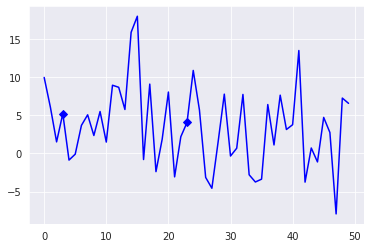

In [90]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[fieldMaskedLekage + randomJitter[0]-1,fieldMasked + randomJitter[0]-1])

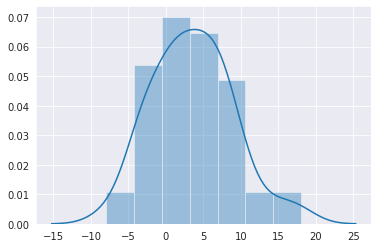

In [91]:
sns.distplot(rawTraces[0])

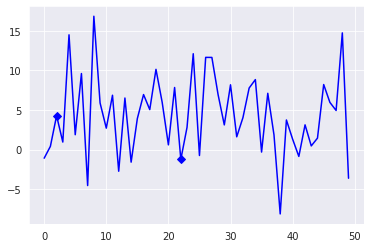

In [92]:
plt.plot(rawTraces[1],'-bD',markevery=[fieldMaskedLekage + randomJitter[1]-1,fieldMasked + randomJitter[1]-1])

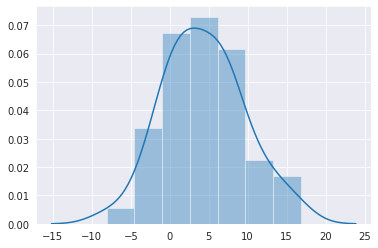

In [93]:
sns.distplot(rawTraces[1])

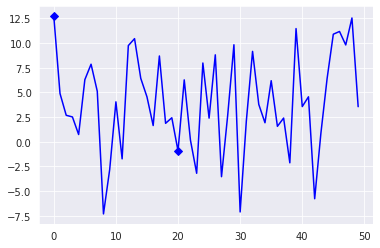

In [94]:
plt.plot(rawTraces[2],'-bD',markevery=[fieldMaskedLekage + randomJitter[2]-1,fieldMasked + randomJitter[2]-1])

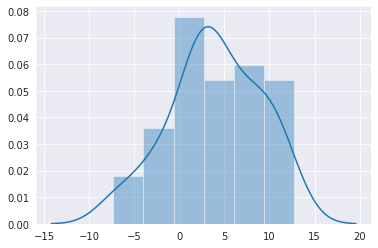

In [95]:
sns.distplot(rawTraces[2])

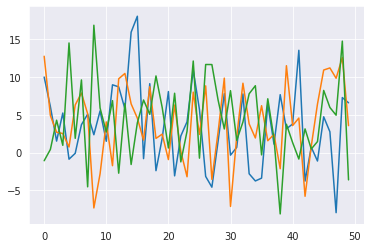

In [96]:
plt.plot(rawTraces[0],'-',rawTraces[2],'-',rawTraces[1],'-')

### Data Path

In [97]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Tests

In [98]:
class TestNotebook(unittest.TestCase):

    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, True) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, True)
    def test_Mask(self):
        self.assertEqual(maskedValue, True)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'FixedPlaintext')
    
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Mask (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.005s

OK


In [99]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,9.979031,6.076056,1.516461,5.226949,-0.872129,-0.095761,3.685895,5.069840,2.355207,5.503891,...,13.513022,-3.766381,0.712470,-1.115322,4.728366,2.749014,-7.941570,7.266105,6.577340,195
1,-1.078982,0.412851,4.276853,0.957896,14.481387,1.882805,9.598199,-4.525240,16.824593,5.889248,...,-0.854511,3.127749,0.472578,1.451460,8.210469,5.960051,4.940186,14.724309,-3.605837,195
2,12.728691,4.894325,2.684714,2.519009,0.735515,6.298378,7.863792,5.122248,-7.314960,-2.806959,...,4.560710,-5.775238,0.853340,6.410215,10.907989,11.184422,9.819381,12.551915,3.559086,195
3,4.241666,5.658385,-8.063267,7.232702,0.259271,4.984645,5.719379,15.212503,-0.705492,9.949289,...,11.398555,1.643019,-5.052079,11.146844,7.981420,0.755873,-1.063455,7.331233,3.044970,195
4,10.042807,2.064392,4.492431,1.708668,3.235269,-6.727160,3.295117,-2.255723,9.155571,1.716901,...,15.674863,-4.257014,1.870393,0.861249,0.175216,8.202649,10.287319,8.037748,0.184350,195


### Write Data

In [100]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS4_A.csv',index=False)